<a href="https://colab.research.google.com/github/atarisafari/CAP4630-AI/blob/master/hw2/hw2_problem2_Ethan_Finlay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST fashion data set
Classification with dense layers, Problem 2

# Underfit Model
The model is far too simple and can't properly make rules for the training or test data. 

## Loading the MNIST fashion data set

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


## Assigning Classes

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Displaying some MNIST fashion items

In [0]:
import matplotlib.pyplot as plt
import numpy as np

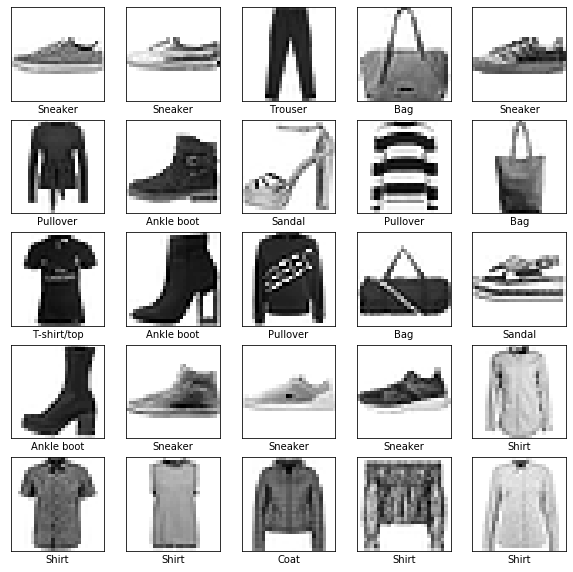

In [0]:
plt.figure(figsize=(10,10))
indices = np.random.choice(np.arange(60000), size=25, replace=False)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[indices[i]], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[indices[i]]])
plt.show()

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build and Compile Model

In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(10, activation=tf.nn.softmax) # The output layer is using softmax
])

# compile the model
model.compile(optimizer='rmsprop', #Root Mean Square Propogation
             loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy for integers
             metrics=['accuracy'])

# train the model
epochs = 10
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 102us/sample - loss: 0.5924 - acc: 0.7987 - val_loss: 0.5150 - val_acc: 0.8242
Epoch 2/10
60000/60000 [==============================] - 5s 91us/sample - loss: 0.4712 - acc: 0.8424 - val_loss: 0.4964 - val_acc: 0.8347
Epoch 3/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.4521 - acc: 0.8499 - val_loss: 0.4778 - val_acc: 0.8403
Epoch 4/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.4409 - acc: 0.8550 - val_loss: 0.4832 - val_acc: 0.8394
Epoch 5/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.4348 - acc: 0.8567 - val_loss: 0.4818 - val_acc: 0.8421
Epoch 6/10
60000/60000 [==============================] - 6s 93us/sample - loss: 0.4304 - acc: 0.8579 - val_loss: 0.4751 - val_acc: 0.8427
Epoch 7/10
60000/60000 [==========

### Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 57us/sample - loss: 0.4802 - acc: 0.8465
Test accuracy: 0.8465


##Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

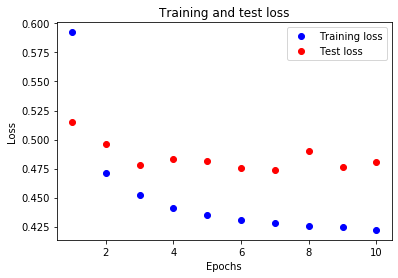

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

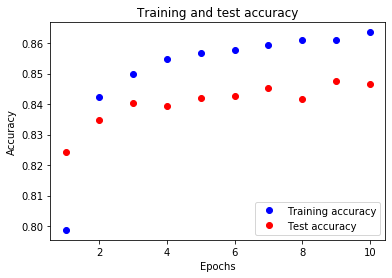

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Overfit Model
A model that overfits is essentially "memorizing" the training data rather than finding a general set of rules, as we'd expect. This can be due to overexposure to the training data (too many epochs) and/or an overcomplicated model. In this example the model is both too complicated and also trains for far too long  

An overfit model will not be able to explain any test data that it wasnt explicitly trained on since all it did was memorize.

## Loading the MNIST fashion data set

In [1]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

##Build and Compile Model

In [0]:
# set up the layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(784, activation=tf.nn.relu), #Hidden layer with 784 neurons and reLu(x) = max(0, x)
    keras.layers.Dense(784*2, activation=tf.nn.leaky_relu), #Hidden layer with 1568 neurons and leaky_reLu(x) = max(0.01x, x)
    keras.layers.Dense(784*2, activation=tf.nn.sigmoid), #Hidden layer with 1568 neurons
    keras.layers.Dense(10, activation=tf.nn.softmax) # The output layer is using softmax
])

# compile the model
model.compile(optimizer='adam', #Adaptive Moment Optimization
             loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy for integers
             metrics=['accuracy'])

# train the model
epochs = 55
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 60000 samples, validate on 10000 samples
Epoch 1/55
60000/60000 [==============================] - 14s 231us/sample - loss: 0.5000 - acc: 0.8200 - val_loss: 0.4053 - val_acc: 0.8529
Epoch 2/55
60000/60000 [==============================] - 13s 214us/sample - loss: 0.3645 - acc: 0.8651 - val_loss: 0.3962 - val_acc: 0.8573
Epoch 3/55
60000/60000 [==============================] - 13s 217us/sample - loss: 0.3323 - acc: 0.8774 - val_loss: 0.3657 - val_acc: 0.8647
Epoch 4/55
60000/60000 [==============================] - 13s 219us/sample - loss: 0.3103 - acc: 0.8836 - val_loss: 0.3849 - val_acc: 0.8631
Epoch 5/55
60000/60000 [==============================] - 13s 217us/sample - loss: 0.2951 - acc: 0.8896 - val_loss: 0.3502 - val_acc: 0.8746
Epoch 6/55
60000/60000 [==============================] - 13s 216us/sample - loss: 0.2825 - acc: 0.8949 - val_loss: 0.3503 - val_acc: 0.8789
Epoch 7/55
60000/60000 

### Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 91us/sample - loss: 0.3580 - acc: 0.8830
Test accuracy: 0.883


##Training/test loss/accuracy during training

In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

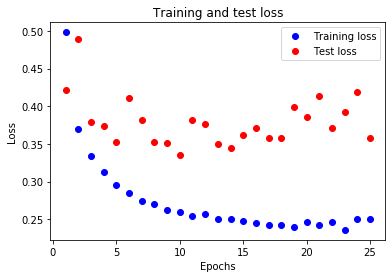

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

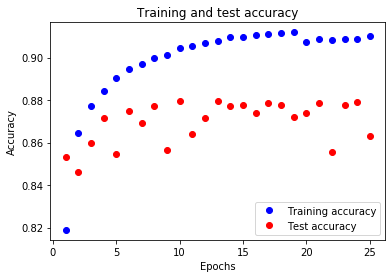

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# "Pretty Good" Model
This model is 'just right'. Essentially, we didn't overcomplicate it or make it too simple, we didn't train for too many epochs, and we used dropout to the fight overfitting. 

## Loading the MNIST fashion data set

In [0]:
%tensorflow_version 1.x
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Preprocess the data

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

##Build and Compile Model


In [0]:
# set up the layers

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dropout(0.5), # Using dropout to fight overfitting
    keras.layers.Dense(784, activation=tf.nn.relu), # Hidden layer with 784 neurons and reLu(x) = max(0, x)
    keras.layers.Dense(28, activation=tf.nn.sigmoid), # Hidden layer with 1568 neurons and sigmoid(x) = 1/(1 + e^-x)
    keras.layers.Dense(10, activation=tf.nn.softmax) # # The output layer is using softmax
])

# compile the model
model.compile(optimizer='adam', #Adaptive Moment Optimization
             loss='sparse_categorical_crossentropy', #sparse_categorical_crossentropy for integers
             metrics=['accuracy'])

# train the model
epochs = 30
history = model.fit(train_images, 
                      train_labels, 
                      epochs=epochs,  
                      validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 8s 126us/sample - loss: 0.6444 - acc: 0.7841 - val_loss: 0.4716 - val_acc: 0.8260
Epoch 2/30
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4637 - acc: 0.8286 - val_loss: 0.4029 - val_acc: 0.8496
Epoch 3/30
60000/60000 [==============================] - 7s 124us/sample - loss: 0.4249 - acc: 0.8404 - val_loss: 0.3898 - val_acc: 0.8555
Epoch 4/30
60000/60000 [==============================] - 8s 126us/sample - loss: 0.4071 - acc: 0.8480 - val_loss: 0.3781 - val_acc: 0.8583
Epoch 5/30
60000/60000 [==============================] - 7s 124us/sample - loss: 0.3910 - acc: 0.8541 - val_loss: 0.3579 - val_acc: 0.8686
Epoch 6/30
60000/60000 [==============================] - 8s 127us/sample - loss: 0.3781 - acc: 0.8567 - val_loss: 0.3634 - val_acc: 0.8682
Epoch 7/30
60000/60000 [==============================] - 8s 126us/sample - loss: 0.3706 - acc: 0.8600 - val_l

### Evaluate accuracy

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 70us/sample - loss: 0.3228 - acc: 0.8823
Test accuracy: 0.8823


##Training/test loss/accuracy during training



In [0]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs+1)

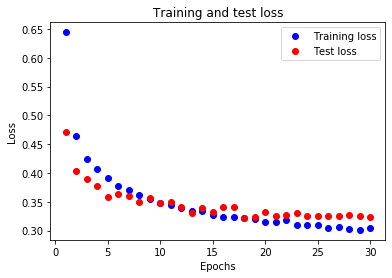

In [0]:
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

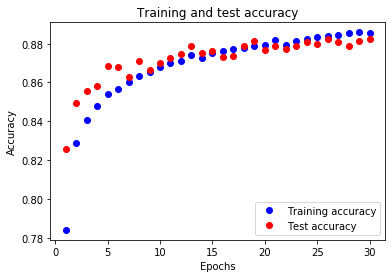

In [0]:
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()